In [2]:
import matplotlib.pyplot as plt
import glob

In [3]:
%matplotlib inline

In [4]:
cache_glob = glob.glob(
    "/home/xyhang/projects/VCIP2023-grand-challenge/cache/PSNR/*/*/*/b_e.npz"
)
import random
random.shuffle(cache_glob)
cache_glob = cache_glob[:1000]

print(len(cache_glob))

1000


In [5]:
import site
site.addsitedir("/home/xyhang/projects/VCIP2023-grand-challenge/")

from src.math_utils import FitKExp

In [6]:
import tqdm
import numpy as np

R2_results = [[], [], [], [], []]
maxerror_results = [[], [], [], [], []]

for filename in tqdm.tqdm(cache_glob):
    curve = FitKExp.load(filename)
    X = curve.X
    Y = curve.Y
    fitters = list([FitKExp(X=X, Y=Y, K=i, retry=False) for i in range(1, 6)])
    for i, fitter in enumerate(fitters):
        R2_results[i].append(fitter.R2(fitter.curve))
        maxerror_results[i].append(fitter.maxerror(fitter.curve))

  0%|          | 0/1000 [00:00<?, ?it/s]

/home/xyhang/anaconda3/envs/SARDCO/lib/python3.9/site-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
100%|██████████| 1000/1000 [15:29<00:00,  1.08it/s]


In [7]:
R2_results = np.asarray(R2_results)
maxerror_results = np.asarray(maxerror_results)

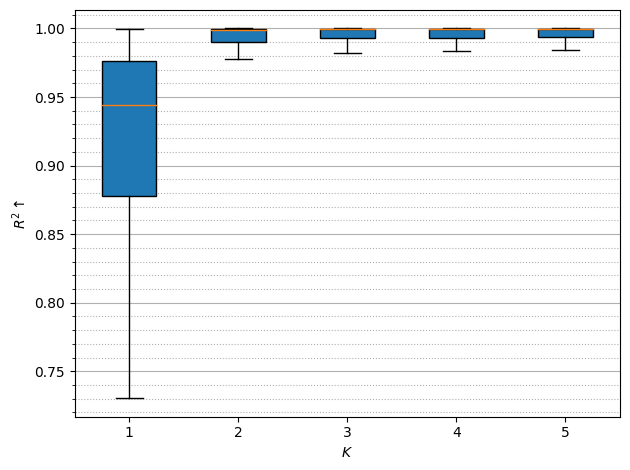

In [9]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("$K$")

ax1.set_ylabel(r"$R^2\uparrow$")
ax1.tick_params(axis="x", which="minor", bottom=False)

ax1.minorticks_on()

ax1.boxplot(list(R2_results), patch_artist=True, showfliers=False)
# ax2.violinplot(
#     list(maxerror_results),
# )

fig.tight_layout()

plt.xticks([1,2,3,4,5])

plt.grid(which='major', axis='y', linestyle='-')
plt.grid(which='minor', axis='y', linestyle=':')

plt.savefig('./K_Exp_R2.png', dpi=300)
plt.savefig('./K_Exp_R2.pdf')

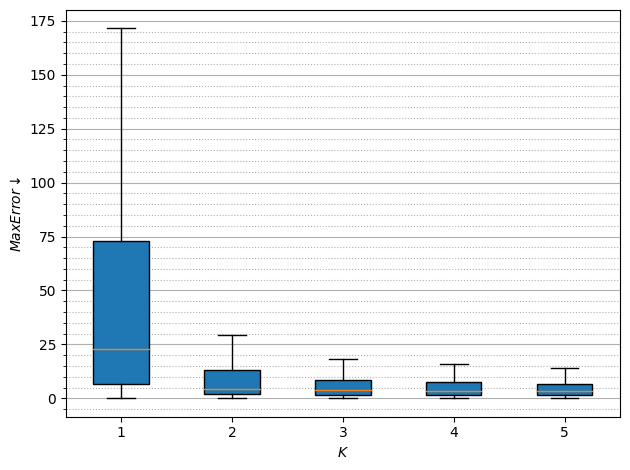

In [10]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("$K$")

ax1.set_ylabel(r"$Max Error\downarrow$")
ax1.tick_params(axis="x", which="minor", bottom=False)

ax1.minorticks_on()

ax1.boxplot(list(maxerror_results), patch_artist=True, showfliers=False)
# ax2.violinplot(
#     list(maxerror_results),
# )

fig.tight_layout()

plt.xticks([1, 2, 3, 4, 5])

plt.grid(which="major", axis="y", linestyle="-")
plt.grid(which="minor", axis="y", linestyle=":")

plt.savefig("./K_Exp_maxerr.png", dpi=300)
plt.savefig("./K_Exp_maxerr.pdf")

[0.9531676852473965, 0.9984323384381224, 0.9990580402453791, 0.9996668954857465, 0.9998862016539073] [218.37093883146736, 59.64146051538883, 45.849465919552074, 23.585484122584248, 11.48168469182302]


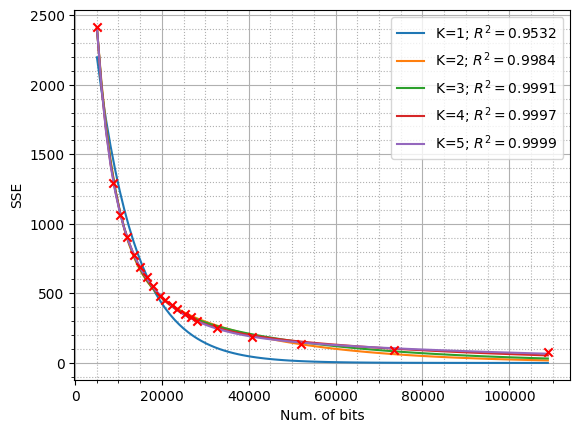

In [36]:
filename = cache_glob[2]
plt.figure(figsize=(6.4, 4.8))
curve = FitKExp.load(filename)
X = curve.X
Y = curve.Y
fitters = list([FitKExp(X=X, Y=Y, K=i, retry=False) for i in range(1, 6)])
R2 = []
Maxerr = []
for i, fitter in enumerate(fitters):
    r2 = fitter.R2(fitter.curve)
    maxerr = fitter.maxerror(fitter.curve)
    if i>1 and r2-R2[-1]>0.01:
        print(i)
    R2.append(r2)
    Maxerr.append(maxerr)
print(R2, Maxerr)
plt.scatter(X, Y, zorder=100, marker='x', color='red')
rng = np.linspace(X.min(), X.max(), 100)
for i, fitter in enumerate(fitters):
    plt.plot(rng, fitter.curve(rng), label=f"K={i+1}; $R^2={fitter.R2(fitter.curve):.4f}$")
plt.legend()
plt.savefig("K_Exp_sample.png", dpi=300)
plt.minorticks_on()
plt.grid(which='major', axis='both')
plt.grid(which='minor', axis='both', linestyle=':')
plt.xlabel("Num. of bits")
plt.ylabel("SSE")
plt.savefig("K_Exp_sample.pdf", bbox_inches="tight")
plt.savefig("K_Exp_sample.png", dpi=300, bbox_inches="tight")